## Install MPSlib


In [ ]:
module_name='mpslib'
try:
    __import__(module_name)
    print(f'{module_name} allready installed. skipping installation.')
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        import os
        os.chdir('/content')
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        os.chdir('/content')
        exe_folder = '/content/mpslib'
    else:
        print('Pleas install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    
import sys
is_colab = 'google.colab' in sys.modules
if is_colab:
    exe_folder = '/content/mpslib'
    !mv "/content/mpslib" "/usr/local/lib/python3.7"
    print("Using MPSlib installed in %s " % exe_folder)
else:
  exe_folder = ''

In [2]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Predefined functions

In [ ]:
def plot(image: np.array, title: str):
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title(f'{title}')
    plt.imshow(image, cmap='gray')

## Select traning image

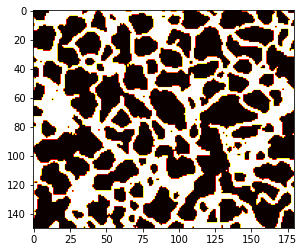

In [9]:

# Strebelle images
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)

# Plotting all dataset images
plot(TI[:,:,0].T, TI_filename)

## Setup MPSlib

In [11]:
O = mps.mpslib(method='mps_snesim_tree', verbose_level=1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=4
O.par['n_cond']=4
#O.par['template_size']=np.array([[20, 5],[20, 5],[1, 1]])
#O.par['origin']=np.array([0,0,0])
#O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
#O.d_hard = np.array([[ 10, 5, 0, 1],
#                     [ 30, 15, 0, 0]])

# soft data
#O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
#                       [ 30, 5, 0, 0.9, 0.1]])

Using MPSlib installed in /usr/local/lib/python3.7 (from /usr/local/lib/python3.7/dist-packages/mpslib/mpslib.py)


## Run MPSlib

In [12]:
!cp -n "/usr/local/lib/python3.7/mpslib/mps_snesim_tree" "/usr/local/lib/python3.7/mps_snesim_tree"
!cp -n "/usr/local/lib/python3.7/mpslib/mps_genesim" "/usr/local/lib/python3.7/mps_genesim"

In [13]:
O.ti = TI
# Serial 
O.run()
# Parallel
#O.run_parallel()

mpslib: writing SNESIM type parameter file: mps.txt
mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/usr/local/lib/python3.7/mps_snesim_tree'
mpslib: Using the following executable to run the model: /usr/local/lib/python3.7/mps_snesim_tree
mpslib: trying to run  /usr/local/lib/python3.7/mps_snesim_tree mps.txt
mpslib: 'mps_snesim_tree' ran in  527.26s 
mpslib: Reading: ti.dat_sg_0.gslib
mpslib: Reading: ti.dat_sg_1.gslib
mpslib: Reading: ti.dat_sg_2.gslib
mpslib: Reading: ti.dat_sg_3.gslib


True

## Plot realizations and E-types

IndexError: ignored

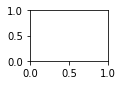

In [8]:
O.plot_reals()
O.plot_etype()

In [103]:
O.par['do_entropy']=1
O.par['do_estimation']=1
O.par['n_real']=1
O.run()

mpslib: writing SNESIM type parameter file: mps.txt
mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/usr/local/lib/python3.7/mps_snesim_tree'
mpslib: Using the following executable to run the model: /usr/local/lib/python3.7/mps_snesim_tree
mpslib: trying to run  /usr/local/lib/python3.7/mps_snesim_tree mps.txt
mpslib: 'mps_snesim_tree' ran in  105.58s 
mpslib: Reading: ti.dat_sg_0.gslib
loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


True

Using MPSlib installed in /usr/local/lib/python3.7 (from /usr/local/lib/python3.7/dist-packages/mpslib/mpslib.py)
mpslib: Writing GENESIM type parameter file: mps_est.txt
mpslib: trying to run 'mps_genesim' on 'mps_est.txt' in folder '/usr/local/lib/python3.7/mps_genesim'
mpslib: Using the following executable to run the model: /usr/local/lib/python3.7/mps_genesim
mpslib: trying to run  /usr/local/lib/python3.7/mps_genesim mps_est.txt
mpslib: 'mps_genesim' ran in  222.34s 
mpslib: Reading: ti.dat_sg_0.gslib
loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


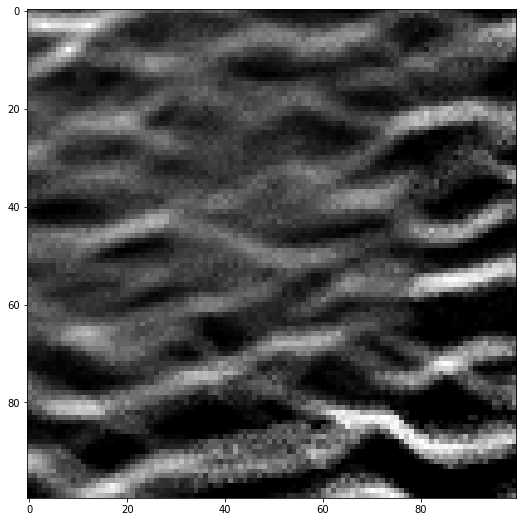

In [2]:
'''
mpslib_estimation:
Estimation vs simulation
'''
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import copy

plt.ion()

#%% Initialize the MPS object, using a specific algorithm (def='mps_snesim_tree')
O=mps.mpslib(method='mps_genesim', verbose_level=1)

#%% Select number of iterations [def=1]
O.par['n_real']=500
O.par['n_cond']=3
O.par['simulation_grid_size'][0]=100
O.par['simulation_grid_size'][1]=100
O.par['simulation_grid_size'][2]=1
O.par['hard_data_fnam']='hard.dat'
#%% Use hard data
# Set hard data
d_hard = np.array([[ 3, 3, 0, 1],
                    [ 8, 8, 0, 1],
                    [ 12, 3, 0, 1]])
    

O.d_hard = d_hard
# Set training image
O.ti = mps.trainingimages.strebelle(di=2, coarse3d=1)[0]
#O.plot_ti()


#%% Run MPSlib in Estimation mode
O_est = copy.deepcopy(O)
O_est.parameter_filename='mps_est.txt'
O_est.delete_local_files() # to make sure no old data are floating around
O_est.par['do_estimation']=1
O_est.par['do_entropy']=1

O_est.par['n_real']=1
O_est.par['n_max_cpdf_count']=1000000 # We need ENESIM/GENESIM and not DS
O_est.par['n_max_ite']=1000000
O_est.remove_gslib_after_simulation=0

O_est.run()

D_est = mps.eas.read('ti.dat_cg_1.gslib')
P1=D_est['Dmat'][:,:,0]
P1=P1.transpose()


D_ent = mps.eas.read('ti.dat_ent_0.gslib')
H=D_ent['Dmat'][:,:,0]
H=H.transpose()

plt.figure(figsize=(16,9))
plt.imshow(P1, cmap='gray')
plt.show()